#**DATA PREPARATION**


## Computing the descriptors

In [ ]:
!pip install rdkit
!pip install mordred

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.7 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176721 sha256=34ebd771151fab35998c4e97906de1a7558ebf85e4e861e1f51a60485e559c4c
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [ ]:
import pandas as pd
import numpy as np


url = "https://raw.githubusercontent.com/Ghaby-X/VP16-inhibitors-pred/main/Datasets/Assayresults_preprocessed.csv"
df = pd.read_csv(url)
df

,Unnamed: 0,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,0,72810.0,C1=CC2=C(C3=C(C=CC=N3)C(=O)C2=O)N=C1,100.0,1
1,1,23618032.0,CN(C)C1=NC=NC2=C1N=CN2[C@H]3[C@@H]([C@@H]([C@H...,99.0,1
2,2,99927.0,CC1C(C(CC(O1)OC2CC(OC(C2O)C)OC3=CC4=CC5=C(C(=O...,99.0,1
3,3,254021.0,C1=CC=C2C(=C1)C3=C(C=C(C=C3)N)C(=O)C2=O,99.0,1
4,4,45280821.0,CCC(C)C1C(CC(=O)O[C@H](C(=O)[C@H](C(=O)NC(C(=O...,99.0,1
...,...,...,...,...,...
2333,2337,665706.0,C1CC2=C(C1)NN=C2C3=NN=C4N3N=C(CS4)C5=CC=CC=C5,0.0,0
2334,2338,25015463.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0
2335,2339,667208.0,CC1=CC2=C(C3=C(CCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,0.0,0
2336,2340,42628533.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0


In [ ]:
from rdkit import Chem
from mordred import Calculator, descriptors

smiles_list = df['Canonical_smiles'].to_list()  # convert the Canonical Smiles columns to a list
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list] # generates the 2D structures of molecular smiles

In [ ]:
#Function to calculate mordred descriptors
def mordred_desc(data):  #receives canonical smiles in a list datastructure
  calc = Calculator(descriptors, ignore_3D=True)
  return calc.pandas(data)


df_mordred = mordred_desc(mols)
df_mordred

  0%|          | 4/2338 [00:02<36:21,  1.07it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 2338/2338 [11:09<00:00,  3.49it/s]


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.704061,10.489183,0,0,21.679248,2.500522,5.001045,21.679248,1.354953,3.734854,...,9.975203,49.287122,210.042927,9.547406,376,29,88.0,108.0,4.666667,3.500000
1,26.345939,21.039992,0,1,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),multiple fragments (SpDiam_A/SpDiam),multiple fragments (SpAD_A/SpAD),multiple fragments (SpMAD_A/SpMAD),multiple fragments (LogEE_A/LogEE),...,10.475737,87.611973,507.199695,7.803072,3400003745,57,180.0,216.0,divide by zero encountered in power (mZagreb1),7.583333
2,59.797706,41.739763,0,0,95.209049,2.573149,5.146298,95.209049,1.252751,5.260938,...,11.452400,116.888499,1084.472653,7.134689,32423,148,416.0,505.0,29.888889,16.333333
3,13.520558,11.114447,0,0,22.436038,2.509547,5.019095,22.436038,1.319767,3.792677,...,10.042771,50.615280,223.063329,8.579359,450,31,94.0,115.0,5.527778,3.666667
4,59.718429,48.210382,0,0,96.779823,2.445513,4.851677,96.779823,1.225061,5.262114,...,11.177523,134.866641,1111.641665,6.616915,30367,137,398.0,466.0,34.805556,17.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,18.849242,15.328468,0,0,31.713787,2.521082,4.896062,31.713787,1.37886,4.120187,...,10.205997,75.047243,322.100065,8.705407,1154,36,132.0,162.0,4.638889,4.916667
2334,29.852963,21.346319,0,1,49.974608,2.468887,4.896136,49.974608,1.315121,4.57028,...,10.549674,83.045006,521.311438,6.770278,5083,67,202.0,239.0,11.444444,8.361111
2335,17.165481,14.859018,0,0,27.856129,2.523211,5.005617,27.856129,1.266188,4.030589,...,10.154596,70.142462,302.115424,7.552886,980,37,118.0,142.0,8.0,4.833333
2336,31.307617,21.998642,0,1,52.526684,2.449418,4.861108,52.526684,1.313167,4.616303,...,10.540038,85.147977,543.295788,7.055789,6018,68,210.0,246.0,11.944444,8.833333


In [ ]:
df_mordred.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('O'), dtype('bool')],
      dtype=object)

In [ ]:
#function that checks if an entry dtype is numeric. If not, it converts it to numeric or not available

def float_converter(x):
    if not isinstance(x, (float, int, bool)):
        try:
            return float(x)
        except ValueError:
            return np.nan
    else:
        return x


# Apply the function to all columns in the DataFrame


In [ ]:
df1 =  df_mordred.applymap(float_converter).copy()
df1

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.704061,10.489183,0,0,21.679248,2.500522,5.001045,21.679248,1.354953,3.734854,...,9.975203,49.287122,210.042927,9.547406,376,29,88.0,108.0,4.666667,3.500000
1,26.345939,21.039992,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,10.475737,87.611973,507.199695,7.803072,3400003745,57,180.0,216.0,NaN,7.583333
2,59.797706,41.739763,0,0,95.209049,2.573149,5.146298,95.209049,1.252751,5.260938,...,11.452400,116.888499,1084.472653,7.134689,32423,148,416.0,505.0,29.888889,16.333333
3,13.520558,11.114447,0,0,22.436038,2.509547,5.019095,22.436038,1.319767,3.792677,...,10.042771,50.615280,223.063329,8.579359,450,31,94.0,115.0,5.527778,3.666667
4,59.718429,48.210382,0,0,96.779823,2.445513,4.851677,96.779823,1.225061,5.262114,...,11.177523,134.866641,1111.641665,6.616915,30367,137,398.0,466.0,34.805556,17.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,18.849242,15.328468,0,0,31.713787,2.521082,4.896062,31.713787,1.378860,4.120187,...,10.205997,75.047243,322.100065,8.705407,1154,36,132.0,162.0,4.638889,4.916667
2334,29.852963,21.346319,0,1,49.974608,2.468887,4.896136,49.974608,1.315121,4.570280,...,10.549674,83.045006,521.311438,6.770278,5083,67,202.0,239.0,11.444444,8.361111
2335,17.165481,14.859018,0,0,27.856129,2.523211,5.005617,27.856129,1.266188,4.030589,...,10.154596,70.142462,302.115424,7.552886,980,37,118.0,142.0,8.000000,4.833333
2336,31.307617,21.998642,0,1,52.526684,2.449418,4.861108,52.526684,1.313167,4.616303,...,10.540038,85.147977,543.295788,7.055789,6018,68,210.0,246.0,11.944444,8.833333


In [ ]:
#checking for columns with more than 90% of its data missing

df1.isnull().sum()[df1.isnull().sum() >= 2110]

SpAbs_Dt     2338
SpMax_Dt     2338
SpDiam_Dt    2338
SpAD_Dt      2338
SpMAD_Dt     2338
             ... 
MINsssPbH    2338
MINssssPb    2338
MDEC-44      2228
MDEN-11      2277
MDEN-13      2143
Length: 127, dtype: int64

In [ ]:
empty_cols = df1.isnull().sum()[df1.isnull().sum() >= 2104].index
df1.drop(empty_cols, axis = 1, inplace = True)
df1

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.704061,10.489183,0,0,21.679248,2.500522,5.001045,21.679248,1.354953,3.734854,...,9.975203,49.287122,210.042927,9.547406,376,29,88.0,108.0,4.666667,3.500000
1,26.345939,21.039992,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,10.475737,87.611973,507.199695,7.803072,3400003745,57,180.0,216.0,NaN,7.583333
2,59.797706,41.739763,0,0,95.209049,2.573149,5.146298,95.209049,1.252751,5.260938,...,11.452400,116.888499,1084.472653,7.134689,32423,148,416.0,505.0,29.888889,16.333333
3,13.520558,11.114447,0,0,22.436038,2.509547,5.019095,22.436038,1.319767,3.792677,...,10.042771,50.615280,223.063329,8.579359,450,31,94.0,115.0,5.527778,3.666667
4,59.718429,48.210382,0,0,96.779823,2.445513,4.851677,96.779823,1.225061,5.262114,...,11.177523,134.866641,1111.641665,6.616915,30367,137,398.0,466.0,34.805556,17.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,18.849242,15.328468,0,0,31.713787,2.521082,4.896062,31.713787,1.378860,4.120187,...,10.205997,75.047243,322.100065,8.705407,1154,36,132.0,162.0,4.638889,4.916667
2334,29.852963,21.346319,0,1,49.974608,2.468887,4.896136,49.974608,1.315121,4.570280,...,10.549674,83.045006,521.311438,6.770278,5083,67,202.0,239.0,11.444444,8.361111
2335,17.165481,14.859018,0,0,27.856129,2.523211,5.005617,27.856129,1.266188,4.030589,...,10.154596,70.142462,302.115424,7.552886,980,37,118.0,142.0,8.000000,4.833333
2336,31.307617,21.998642,0,1,52.526684,2.449418,4.861108,52.526684,1.313167,4.616303,...,10.540038,85.147977,543.295788,7.055789,6018,68,210.0,246.0,11.944444,8.833333


In [ ]:
df1.to_csv("df_mordred.csv")

In [ ]:
# save directly to drive
!cp "df_mordred.csv" "/content/drive/MyDrive/Colab Notebooks/VP16-inhibitors-pred/Datasets"

## Importing datasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


mordred_path = "/content/drive/MyDrive/Colab Notebooks/VP16-inhibitors-pred/Datasets/df_mordred.csv"
assay_path = "/content/drive/MyDrive/Colab Notebooks/VP16-inhibitors-pred/Datasets/Assayresults_preprocessed.csv"

In [4]:
df_mordred = pd.read_csv(mordred_path, index_col = 0)
df_raw = pd.read_csv(assay_path)

In [5]:
df_mordred

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.704061,10.489183,0,0,21.679248,2.500522,5.001045,21.679248,1.354953,3.734854,...,9.975203,49.287122,210.042927,9.547406,376,29,88.0,108.0,4.666667,3.500000
1,26.345939,21.039992,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,10.475737,87.611973,507.199695,7.803072,3400003745,57,180.0,216.0,NaN,7.583333
2,59.797706,41.739763,0,0,95.209049,2.573149,5.146298,95.209049,1.252751,5.260938,...,11.452400,116.888499,1084.472653,7.134689,32423,148,416.0,505.0,29.888889,16.333333
3,13.520558,11.114447,0,0,22.436038,2.509547,5.019095,22.436038,1.319767,3.792677,...,10.042771,50.615280,223.063329,8.579359,450,31,94.0,115.0,5.527778,3.666667
4,59.718429,48.210382,0,0,96.779823,2.445513,4.851677,96.779823,1.225061,5.262114,...,11.177523,134.866641,1111.641665,6.616915,30367,137,398.0,466.0,34.805556,17.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,18.849242,15.328468,0,0,31.713787,2.521082,4.896062,31.713787,1.378860,4.120187,...,10.205997,75.047243,322.100065,8.705407,1154,36,132.0,162.0,4.638889,4.916667
2334,29.852963,21.346319,0,1,49.974608,2.468887,4.896136,49.974608,1.315121,4.570280,...,10.549674,83.045006,521.311438,6.770278,5083,67,202.0,239.0,11.444444,8.361111
2335,17.165481,14.859018,0,0,27.856129,2.523211,5.005617,27.856129,1.266188,4.030589,...,10.154596,70.142462,302.115424,7.552886,980,37,118.0,142.0,8.000000,4.833333
2336,31.307617,21.998642,0,1,52.526684,2.449418,4.861108,52.526684,1.313167,4.616303,...,10.540038,85.147977,543.295788,7.055789,6018,68,210.0,246.0,11.944444,8.833333


In [6]:
X = df_mordred.copy()
y = df_raw["Activity_outcome"]

## Preprocessing and Feature selection

Splitting of dataset on the onset

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=15)

In [8]:
X_train.describe()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
count,1636.000000,1636.000000,1636.000000,1636.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,...,1636.000000,1636.000000,1636.000000,1636.000000,1.636000e+03,1636.000000,1636.000000,1636.000000,1485.000000,1636.000000
mean,20.367633,16.150670,0.168093,0.226773,33.724737,2.443935,4.831111,33.724737,1.286329,4.164896,...,10.117099,70.182206,377.988217,8.341881,6.571537e+08,41.112469,137.013447,161.084352,8.747166,5.793815
std,5.354165,3.710456,0.545639,0.525128,8.617503,0.093284,0.170120,8.617503,0.039126,0.244446,...,0.372557,11.557576,94.629084,1.172424,2.951998e+09,14.388351,38.044137,47.614330,2.763521,1.461126
min,5.835194,5.606207,0.000000,0.000000,9.953960,2.193527,4.345820,9.953960,1.077227,2.980241,...,8.555837,35.908899,127.009185,5.582498,6.000000e+01,8.000000,36.000000,39.000000,3.222222,1.861111
25%,16.999072,13.880731,0.000000,0.000000,28.338383,2.378154,4.713490,28.338383,1.263067,4.022392,...,9.907803,61.674709,317.836689,7.553846,1.207000e+03,32.000000,114.000000,132.000000,7.138889,4.857639
50%,19.977329,15.810046,0.000000,0.000000,33.303860,2.443285,4.818616,33.303860,1.288886,4.176828,...,10.124709,71.069741,370.152872,8.178418,1.930500e+03,39.000000,134.000000,156.000000,8.375000,5.680556
75%,23.049090,17.955403,0.000000,0.000000,38.121975,2.495892,4.925354,38.121975,1.313901,4.317221,...,10.328967,77.863317,425.080657,8.947071,3.162500e+03,47.000000,156.000000,184.000000,9.951389,6.527778
max,59.718429,48.210382,4.000000,5.000000,96.779823,2.820371,5.459943,96.779823,1.398412,5.262114,...,11.613883,134.866641,1111.641665,17.610248,3.520000e+10,145.000000,400.000000,488.000000,34.805556,17.611111


Checking the Integrity of the data
The distribution of missing entries in each column

Text(0.5, 1.0, 'Distribution of percentage missing values')

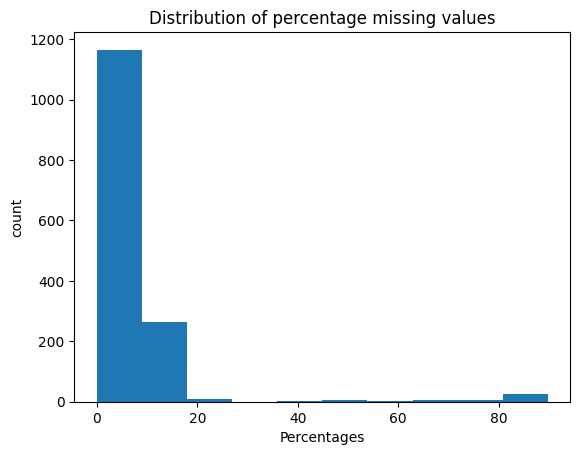

In [9]:
#columns with null_entries

null_percentages = (X_train.isna().sum()/len(X_train)) * 100

plt.hist(null_percentages, bins = 10)
plt.xlabel('Percentages')
plt.ylabel('count')
plt.title('Distribution of percentage missing values')

Removal of columns that has more than 60% of its entries missing to maintain the integrity of the dataset

In [10]:
#Dropping missing values of 60% of the data and imputing missing values with KNN impute
from math import ceil
from sklearn.impute import SimpleImputer

threshold = ceil(0.6*len(X_train))

new_columns = X_train.columns[X_train.isnull().sum() <= threshold]
X_train = X_train[new_columns].copy()

impute = SimpleImputer().fit(X_train)
X_train = pd.DataFrame(impute.transform(X_train), columns = new_columns)

Distributions of some descriptor features

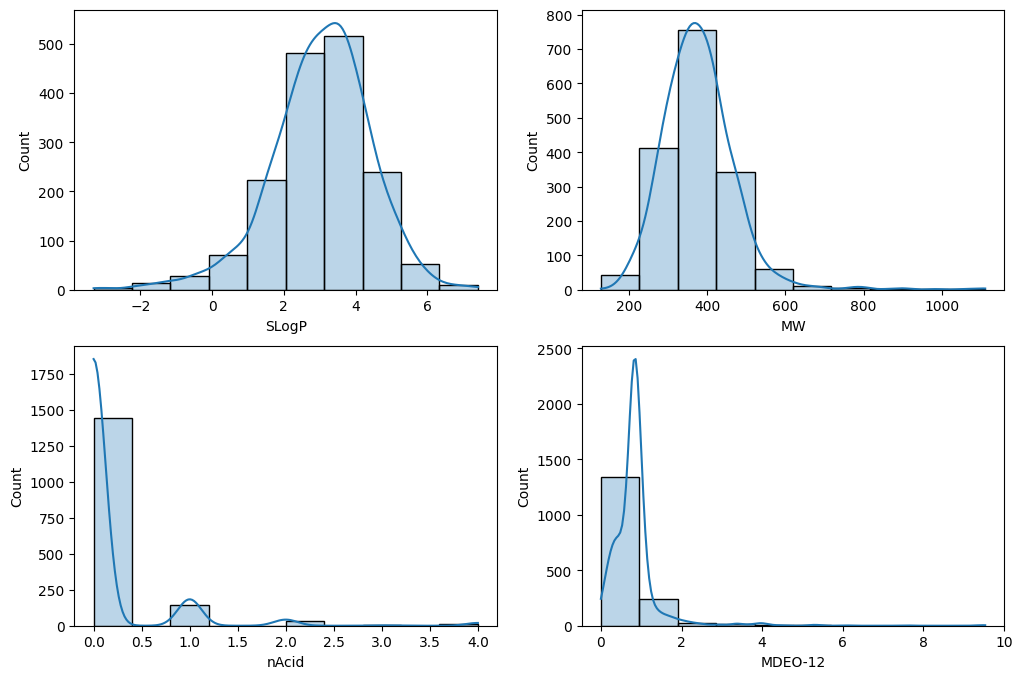

In [11]:
import seaborn as sns

plt.figure(figsize = (12,8))

plt.subplot(221)
sns.histplot(X_train['SLogP'], bins = 10, kde = True, alpha = 0.3)

plt.subplot(222)
sns.histplot(X_train['MW'], bins = 10, kde = True, alpha = 0.3)

plt.subplot(223)
sns.histplot(X_train['nAcid'], bins = 10, kde = True, alpha = 0.3)

plt.subplot(224)
sns.histplot(X_train['MDEO-12'], bins = 10, kde = True, alpha = 0.3)

plt.show()

In [12]:
#Getting rid of low variance features
from sklearn.feature_selection import VarianceThreshold

variance_filter = VarianceThreshold(threshold = 0.1).fit(X_train)
filtered_cols = X_train.columns[variance_filter.get_support()]
X_train = X_train[filtered_cols]

**Dependecies of features**

To determine the relation between different descriptors or b/n descriptors and their target, the type of data, that is whether categorical or numerical would require different testing technique.

Data, with unique entries less than 10 is considered to be a categorical input where data with higher unique entries is considered continuous

In [13]:
# features that have small unique columns, less than 10
small_discrete_cols = []
continuous_cols = []

for col in X_train.columns:
  if X_train[col].nunique() < 10:
    small_discrete_cols.append(col)
  else:
    continuous_cols.append(col)

print("small discrete cols: " + str(len(small_discrete_cols)))
print("continuous cols: " + str(len(continuous_cols)))

small discrete cols: 67
continuous cols: 739


In [14]:
X_train

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpAD_A,VE1_A,VR1_A,VR2_A,VR3_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,20.482236,15.934713,0.0,0.0,35.071854,35.071854,3.967264,578.334610,22.243639,7.315664,...,10.183730,75.372284,349.179027,7.126103,1.734000e+03,41.0,138.0,164.0,6.888889,5.750000
1,21.638832,16.085455,0.0,1.0,33.724737,33.724737,4.152498,5170.655227,110.043193,6.769233,...,10.085851,63.992488,433.121149,8.020762,2.800002e+09,41.0,142.0,162.0,8.747166,6.166667
2,12.158715,10.443317,0.0,0.0,20.516822,20.516822,3.633555,83.141235,5.196327,4.890544,...,9.437874,47.920298,215.069477,8.602779,4.470000e+02,21.0,78.0,88.0,4.944444,3.638889
3,16.527024,13.226854,0.0,0.0,27.003573,27.003573,4.121754,130.897651,6.233221,5.616353,...,10.010412,63.026880,301.113650,7.527841,9.140000e+02,37.0,112.0,132.0,6.618056,4.527778
4,18.050928,16.072118,0.0,0.0,29.856304,29.856304,3.823930,256.509849,10.687910,6.422636,...,10.006540,72.563259,330.121572,7.860037,1.442000e+03,38.0,120.0,141.0,10.000000,5.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,19.965399,16.675758,0.0,0.0,32.963854,32.963854,4.047858,305.745452,11.759440,6.678264,...,10.123306,74.855427,374.162187,7.635963,1.648000e+03,40.0,134.0,157.0,9.000000,5.861111
1632,22.473356,16.373610,0.0,0.0,36.890704,36.890704,4.452620,475.386892,16.392651,7.228840,...,10.135512,64.228135,387.194677,7.170272,2.812000e+03,42.0,148.0,168.0,9.840278,6.305556
1633,23.977329,18.100251,0.0,0.0,40.553762,40.553762,4.193960,582.454456,19.415149,7.465863,...,10.423144,79.659554,420.089226,9.132374,2.529000e+03,50.0,164.0,197.0,7.611111,6.527778
1634,21.569882,15.657518,0.0,1.0,35.974599,35.974599,4.955499,179.262120,6.402219,6.218469,...,9.991544,62.780610,386.268176,6.230132,2.581000e+03,39.0,140.0,158.0,8.888889,6.222222


In [15]:
#Chi-squared test for categorical features and target
from scipy.stats import chi2_contingency

p_value_mask = []

for col in X_train[small_discrete_cols].columns:
  res = chi2_contingency(pd.crosstab(X_train[col].values,y_train.values))
  p_value_mask.append(res.pvalue > 0.05)

filtered_discrete_cols = X_train[small_discrete_cols].columns[p_value_mask]
len(filtered_discrete_cols)

21

In [16]:
#Removing highly correlated continuous columns

X_train[continuous_cols].corr()

,ABC,ABCGG,SpAbs_A,SpAD_A,VE1_A,VR1_A,VR2_A,VR3_A,nAromAtom,nAromBond,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
ABC,1.000000,0.973078,0.921505,0.921505,0.630202,0.205579,0.205184,0.726957,0.318776,0.308217,...,0.837353,0.791212,0.943535,-0.241814,2.066420e-01,0.944717,0.993618,0.976390,0.816696,0.980345
ABCGG,0.973078,1.000000,0.872915,0.872915,0.606500,0.177150,0.176705,0.668600,0.255235,0.243219,...,0.838649,0.815565,0.930024,-0.199722,2.495836e-01,0.940871,0.972563,0.961273,0.861651,0.958171
SpAbs_A,0.921505,0.872915,1.000000,1.000000,0.679109,0.213710,0.215008,0.786862,0.297659,0.289341,...,0.748981,0.722828,0.883498,-0.261170,5.825527e-07,0.862467,0.909284,0.890831,0.770523,0.915713
SpAD_A,0.921505,0.872915,1.000000,1.000000,0.679109,0.213710,0.215008,0.786862,0.297659,0.289341,...,0.748981,0.722828,0.883498,-0.261170,5.825527e-07,0.862467,0.909284,0.890831,0.770523,0.915713
VE1_A,0.630202,0.606500,0.679109,0.679109,1.000000,0.035539,0.033212,0.200557,0.283621,0.267882,...,0.550890,0.448243,0.592802,-0.123898,3.572320e-07,0.609222,0.628364,0.619920,0.529493,0.611821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WPol,0.944717,0.940871,0.862467,0.862467,0.609222,0.201895,0.195409,0.653993,0.194078,0.193578,...,0.912298,0.747527,0.883137,-0.250962,1.492293e-01,1.000000,0.968358,0.981578,0.807196,0.904866
Zagreb1,0.993618,0.972563,0.909284,0.909284,0.628364,0.204311,0.200440,0.709635,0.300843,0.294167,...,0.883496,0.809632,0.930052,-0.236524,1.991571e-01,0.968358,1.000000,0.994289,0.805992,0.957719
Zagreb2,0.976390,0.961273,0.890831,0.890831,0.619920,0.201335,0.194728,0.687437,0.282231,0.279378,...,0.915189,0.817917,0.906585,-0.233760,1.849375e-01,0.981578,0.994289,1.000000,0.784063,0.928440
mZagreb1,0.816696,0.861651,0.770523,0.770523,0.529493,0.204443,0.206979,0.609129,0.015858,0.003484,...,0.647821,0.596180,0.851200,-0.126534,2.654938e-01,0.807196,0.805992,0.784063,1.000000,0.828754


In [17]:
def correlation(dataset, threshold):
  cols_correlated = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        cols_correlated.add(colname)
  return cols_correlated

In [18]:
corr_features = correlation(X_train[continuous_cols], 0.9)
filtered_continuous_columns = list(X_train[continuous_cols].drop(corr_features, axis = 1).columns)
len(filtered_continuous_columns)

300

Handling data Imbalance with synthetic minority oversampling


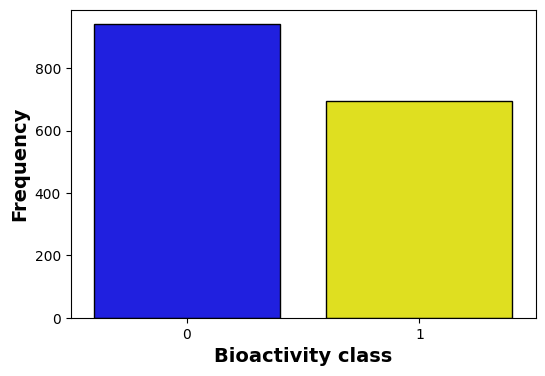

In [19]:
#import seaborn as sns

plt.figure(figsize=(6,4))

sns.countplot(x=y_train, edgecolor='black', palette=['blue', 'yellow'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('plot_bioactivity_class.pdf')
plt.show()

In [20]:
final_columns = filtered_continuous_columns.copy()
for x in filtered_discrete_cols:
    final_columns.append(x)
len(final_columns)

321

In [21]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state = 14)
X_resampled, y_resampled = smt.fit_resample(X_train[final_columns], y_train)
X_resampled

,ABC,VE1_A,VR1_A,VR3_A,nAromAtom,nHetero,nN,nO,nX,ATS0dv,...,n5AHRing,n9FRing,n10FRing,n9FHRing,n10FHRing,nFaRing,n9FaRing,n10FaRing,nFaHRing,n9FaHRing
0,20.482236,3.967264,578.334610,7.315664,12.000000,5.000000,3.000000,2.000000,0.000000,334.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1,21.638832,4.152498,5170.655227,6.769233,12.000000,6.000000,1.000000,3.000000,2.000000,354.049383,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,12.158715,3.633555,83.141235,4.890544,12.000000,5.000000,3.000000,2.000000,0.000000,262.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
3,16.527024,4.121754,130.897651,5.616353,12.000000,4.000000,1.000000,2.000000,0.000000,250.444444,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,18.050928,3.823930,256.509849,6.422636,11.000000,7.000000,2.000000,5.000000,0.000000,402.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,27.130369,4.920216,410.765236,7.189921,20.445069,7.611267,3.611267,2.777466,0.611267,479.161812,...,0.388733,0.388733,0.000000,0.388733,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1878,22.712306,4.152498,5170.655227,6.769233,12.683832,4.875667,2.000000,1.875667,1.000000,349.065278,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1879,26.670336,4.152498,5170.655227,6.769233,16.561062,7.900443,1.760177,3.000000,2.140266,439.315758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.380089,0.0,0.000000,0.380089,0.0
1880,20.755667,4.356295,225.396297,6.378686,16.891526,6.108474,2.216947,2.891526,0.000000,375.915597,...,0.891526,0.891526,0.216947,0.891526,0.216947,0.108474,0.0,0.108474,0.108474,0.0


In [26]:
from sklearn.model_selection import GridSearchCV

X_test_imputed = pd.DataFrame(impute.transform(X_test[new_columns]), columns = new_columns)
final_X_test = X_test_imputed[final_columns]

## MODEL BUILDING AND EVALUATION

RANDOM FOREST CLASSIFIER

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(random_state = 45)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

grid_search.fit(X_resampled, y_resampled)

print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best Parameters:  {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 500}
Best Accuracy:  0.8284214684801625


In [ ]:
from sklearn.metrics import classification_report

rfc = RandomForestClassifier(random_state = 45, criterion = 'entropy', \
                             max_features = 'log2', n_estimators = 500).fit(X_resampled, y_resampled)

y_pred = rfc.predict(final_X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       411
           1       0.82      0.72      0.77       291

    accuracy                           0.82       702
   macro avg       0.82      0.81      0.81       702
weighted avg       0.82      0.82      0.82       702



GRADIENT BOOST CLASSIFIER

In [21]:
from sklearn.ensemble import GradientBoostingClassifier  # or GradientBoostingRegressor



gbc = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 10],
}

g_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5)

# Fit the grid search to your training data
g_search.fit(X_resampled, y_resampled)

# Print the best hyperparameters and corresponding accuracy
print("Best Parameters: ", g_search.best_params_)
print("Best Accuracy: ", g_search.best_score_)

Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 300}
Best Accuracy:  0.8183235509904622


In [22]:
from sklearn.metrics import classification_report

gb_classifier = GradientBoostingClassifier(learning_rate=0.1, \
                              n_estimators = 300).fit(X_resampled, y_resampled)

y_pred = gb_classifier.predict(final_X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       411
           1       0.76      0.74      0.75       291

    accuracy                           0.80       702
   macro avg       0.79      0.79      0.79       702
weighted avg       0.80      0.80      0.80       702



Deep Neural Network

In [118]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.optimizers import Adam

model = keras.Sequential([
    layers.BatchNormalization(input_shape = [321]),

    layers.Dense(70, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.3),

    layers.Dense(10, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.3),

    layers.Dense(1, activation = 'sigmoid')
])

early_stopping = callbacks.EarlyStopping(
    min_delta = 0.01,
    patience = 20,
    restore_best_weights = True
)

model.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)

Best Validation Loss: 0.4400
Best Validation Accuracy: 0.8134


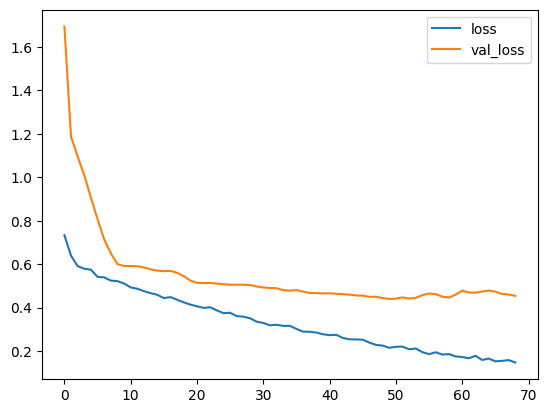

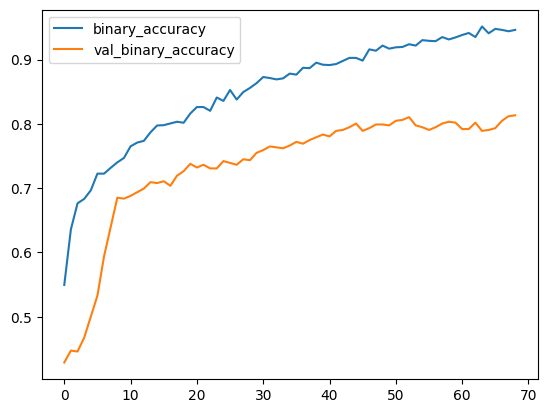

In [119]:
history = model.fit(
    X_resampled, y_resampled,
    validation_data = (final_X_test, y_test),
    batch_size = 400,
    epochs = 100,
    callbacks = [early_stopping],
    verbose = 0
)



history_df = pd.DataFrame(history.history)


history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))

In [125]:
y_probabilities = model.predict(final_X_test)

# Apply a threshold to get binary predictions
binary_predictions = (y_probabilities > 0.5).astype(int)
binary_predictions.shape

22/22 [==============================] - 0s 2ms/step


(702, 1)

In [128]:
print(classification_report(y_test, binary_predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       411
           1       0.76      0.76      0.76       291

    accuracy                           0.80       702
   macro avg       0.79      0.79      0.79       702
weighted avg       0.80      0.80      0.80       702

